## Author : Joseph Hencil Peter
### (Temasek Admission Id : 1880282G)
#### Problem : Classification of CIFAR 10 dataset using Convolution Neural Network


In [0]:
#Inport the required libraries to classify the dataset.
import keras
from keras import callbacks 
from keras.datasets import cifar10 # dataset
from keras.models import Sequential # Sequential model
from keras.layers import Dense, Activation # Fully Connected (Dense) and Activation layers
from keras.layers import Softmax, Dropout # Softmax and Dropout layers 
from keras.layers import Conv2D, MaxPooling2D #2 dimentional convolution and Maxpooling layers
from keras.layers import Flatten # Flatten layer
from keras.optimizers import SGD, RMSprop # SGD and RMSprop optimization functions
from keras import backend as K  # backend identification


from datetime import datetime as dt
from sklearn.metrics import confusion_matrix
import numpy as np   #mathematics operations
import matplotlib.pyplot as plt #Data visualization   
import seaborn as sn
import pandas  as pd


%matplotlib inline
%config InlineBackend.figure_format='retina'
plt.style.use('ggplot')

In [0]:
#Load the training and test dataset for the classification
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [65]:
#Print the training as well as test dataset details
print('Training Dataset Details')
print('x_train Records Count : ', x_train.shape[0])
print('x_train shape : ', x_train.shape[1:])
print('y_train Records Count : ', y_train.shape[0])
print('y_train shape : ', y_train.shape[1:])

print('\nTest Dataset Details')
print('x_test Records Count : ', x_test.shape[0])
print('x_test shape : ', x_test.shape[1:])
print('y_test Records Count : ', y_test.shape[0])
print('y_test shape : ', y_test.shape[1:])


Training Dataset Details
x_train Records Count :  50000
x_train shape :  (32, 32, 3)
y_train Records Count :  50000
y_train shape :  (1,)

Test Dataset Details
x_test Records Count :  10000
x_test shape :  (32, 32, 3)
y_test Records Count :  10000
y_test shape :  (1,)


In [66]:
#Print label, min and max values
print('Training dataset labels : ', np.unique(y_train))
print('Test dataset labels : ', np.unique(y_test))

print('Training dataset Min Value :', np.min(x_train))
print('Training dataset Max Value :', np.max(x_train))


print('Test dataset Min Value:', np.min(x_test))
print('Test dataset Max Value :', np.max(x_test))

Training dataset labels :  [0 1 2 3 4 5 6 7 8 9]
Test dataset labels :  [0 1 2 3 4 5 6 7 8 9]
Training dataset Min Value : 0
Training dataset Max Value : 255
Test dataset Min Value: 0
Test dataset Max Value : 255


In [0]:
#Hyperparameters initialization
batch_size=64
epochs=40
num_classes =10
input_shape= (32,32)

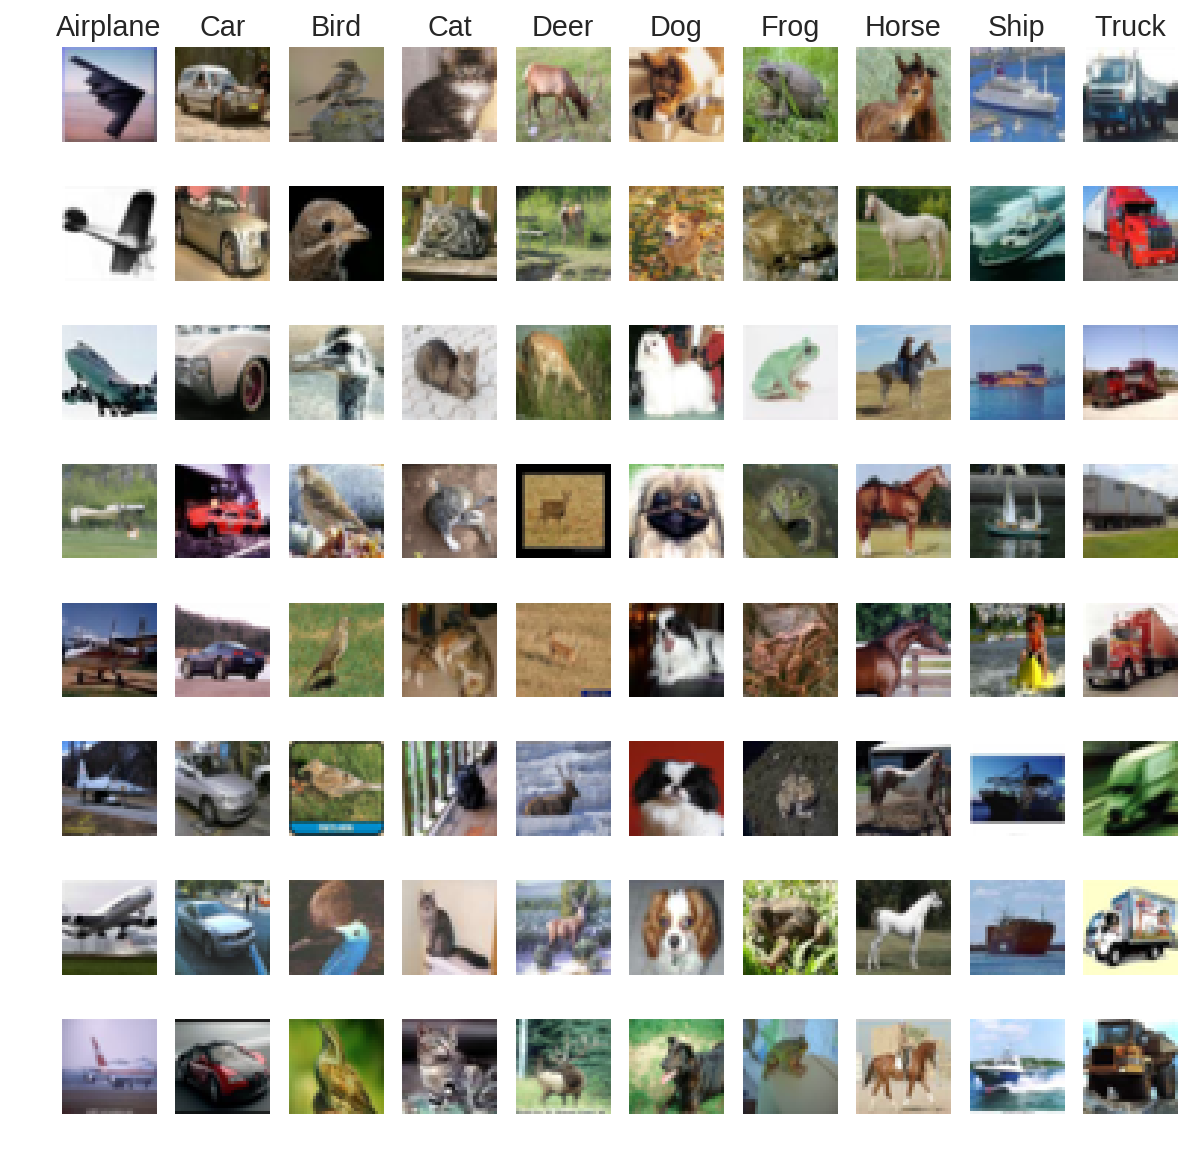

In [68]:
#Draw 8 images in each class
class_names=[0,1,2,3,4,5,6,7,8,9]
class_strNames=['Airplane','Car', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship','Truck'] # string names
sample_count = 8
#increase the default size of the images
fig = plt.gcf()
fig.set_size_inches(10, 10)
for index, value in enumerate(class_names):
    cIndexes = np.where(np.equal(y_train, value)==1)
    cIndexes = np.random.choice(cIndexes[0], sample_count, replace=False)
    for sIndex, sValue in enumerate(cIndexes):
        plt.subplot(sample_count, num_classes, sIndex * num_classes + index + 1)
        plt.imshow(x_train[sValue])
        plt.axis('off')
        if (sIndex ==0): #first image of each class
            plt.title(class_strNames[index])

In [0]:
#Data Preprocessing
img_rows, img_cols = 32, 32
if K.image_data_format == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 3, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 3, img_rows, img_cols)
    input_shape = (3, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 3)
    x_test = x_test.reshape(x_test.shape[0],  img_rows, img_cols, 3)
    input_shape = (img_rows, img_cols, 3)

In [0]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

x_train /= 255
x_test /= 255

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [0]:
#Construct network Layers
model = Sequential() #Sequential Model
#Add First Convolution Layer
model.add(Conv2D(64,kernel_size=(5,5),padding='same',input_shape=(32,32,3),use_bias='True',kernel_initializer='glorot_uniform',bias_initializer='zeros'))
model.add(Activation('relu'))

#Second Convolution Layer
model.add(Conv2D(64,kernel_size=(5,5)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Third Convolution Layer
model.add(Conv2D(64,kernel_size=(3,3)))
model.add(Activation('relu'))

#Fourth Convolution Layer
model.add(Conv2D(64,kernel_size=(3,3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

#Flattening 
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(10))
model.add(Activation('softmax'))

In [72]:
#print the model summary
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 64)        4864      
_________________________________________________________________
activation_7 (Activation)    (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 28, 28, 64)        102464    
_________________________________________________________________
activation_8 (Activation)    (None, 28, 28, 64)        0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 12, 12, 64)        36928     
__________

In [73]:
#Mount google drive
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [74]:
#Compile the model 
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=RMSprop(lr=0.0001, decay=1e-6),metrics=['accuracy'])

#Train the model
t1 = dt.now()
model_checkpoints = callbacks.ModelCheckpoint('/content/gdrive/My Drive/CNNProject/Final/FinalModel_weights_{epoch:02d}_{val_loss:.2f}_Proj.h5', monitor='val_loss',verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
model_log = model.fit(x_train, y_train,batch_size=batch_size, epochs=epochs, validation_data=(x_test, y_test), callbacks=[model_checkpoints])
t2 = dt.now()

#Calculate the training time
delta = t2 - t1
trainingTime = str(delta.total_seconds())

Train on 50000 samples, validate on 10000 samples
Epoch 1/40
50000/50000 [==============================] - 22s 436us/step - loss: 1.8723 - acc: 0.3114 - val_loss: 1.6337 - val_acc: 0.4037

Epoch 00001: val_loss improved from inf to 1.63365, saving model to /content/gdrive/My Drive/CNNProject/Final/FinalModel_weights_01_1.63_Proj.h5
Epoch 2/40
50000/50000 [==============================] - 22s 436us/step - loss: 1.5762 - acc: 0.4266 - val_loss: 1.5339 - val_acc: 0.4326

Epoch 00002: val_loss improved from 1.63365 to 1.53389, saving model to /content/gdrive/My Drive/CNNProject/Final/FinalModel_weights_02_1.53_Proj.h5
Epoch 3/40
50000/50000 [==============================] - 21s 429us/step - loss: 1.4340 - acc: 0.4794 - val_loss: 1.3257 - val_acc: 0.5273

Epoch 00003: val_loss improved from 1.53389 to 1.32574, saving model to /content/gdrive/My Drive/CNNProject/Final/FinalModel_weights_03_1.33_Proj.h5
Epoch 4/40
50000/50000 [==============================] - 21s 426us/step - loss: 1.3406

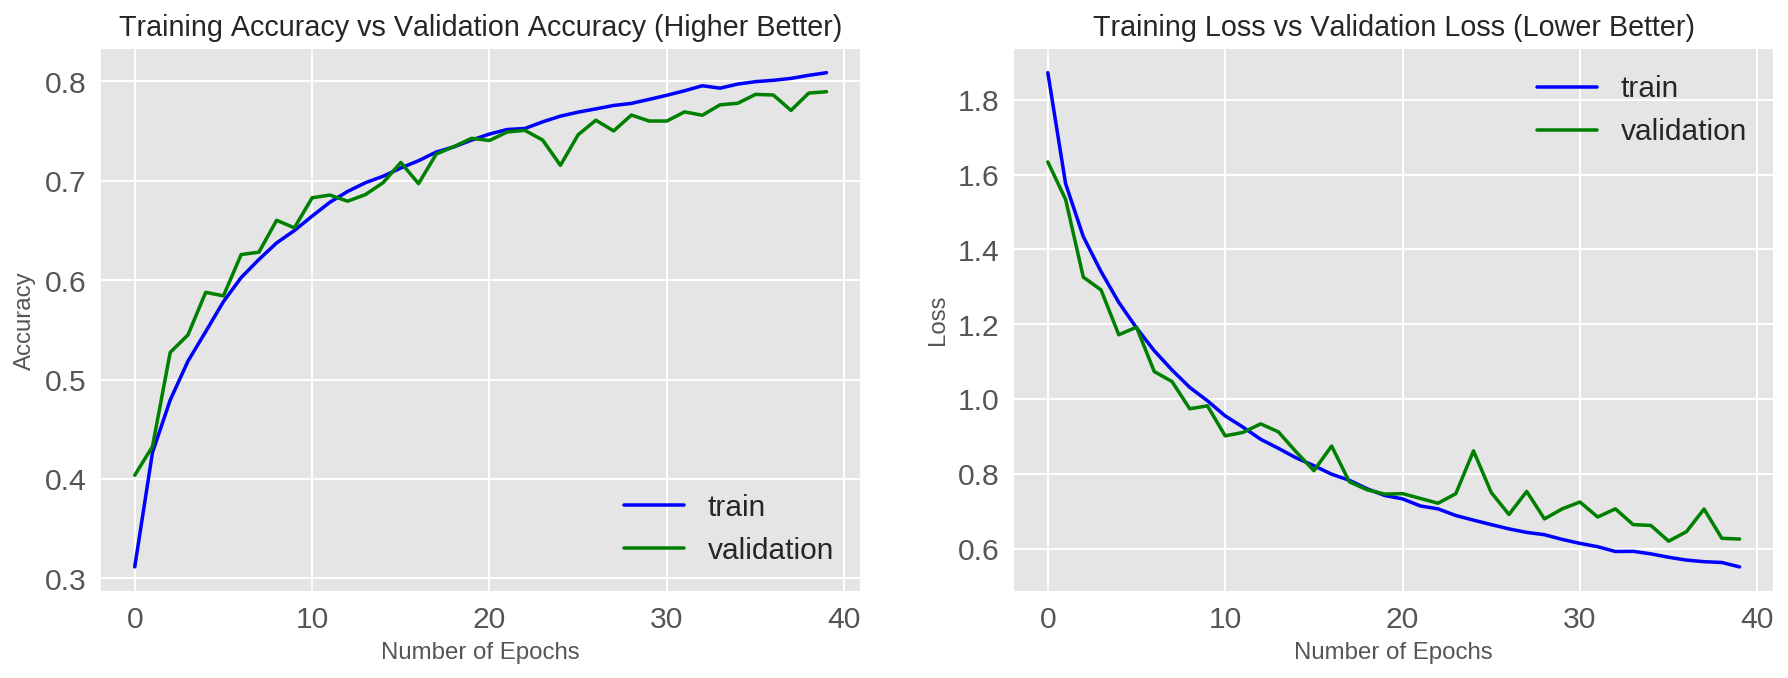

In [75]:
f, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,5))

ax1.plot(model_log.history['acc'],'b')
ax1.plot(model_log.history['val_acc'],'g')
ax1.set_title('Training Accuracy vs Validation Accuracy (Higher Better)')
ax1.set(xlabel='Number of Epochs', ylabel='Accuracy')
ax1.legend(['train', 'validation'], loc='lower right')

ax2.plot(model_log.history['loss'], 'b')
ax2.plot(model_log.history['val_loss'],'g')
ax2.set_title('Training Loss vs Validation Loss (Lower Better)')
ax2.set(xlabel='Number of Epochs', ylabel='Loss')
ax2.legend(['train', 'validation'], loc='upper right')

In [76]:

#Print the Test Accuracy
scores = model.evaluate(x_test, y_test, verbose=0)
print("Test Accuracy: %.2f%%" % (scores[1]*100))

Test Accuracy: 78.97%


In [0]:
#reload the dataset 
(x_train2, y_train2), (x_test2, y_test2) = cifar10.load_data()
y_testpredict = model.predict_classes(x_test2)


In [78]:
#Confusion Matrix
confusionmatrix = confusion_matrix(y_test2, y_testpredict)
print(confusionmatrix)

[[842  18   2   0   2   0   3  26  26  81]
 [ 29 808   1   0   0   0   1   2   8 151]
 [253  22 223  12   5  74  37 246  24 104]
 [121  17   8 199   7 196  32 231  59 130]
 [116  13   9  17 139  37  27 463  30 149]
 [ 49   7   8  31   1 584  18 203  22  77]
 [ 51  25   4  10   0  30 598 101  40 141]
 [ 23   3   2   0   1  15   0 891   3  62]
 [164  21   1   0   0   1   0  12 702  99]
 [ 27  28   0   1   0   0   0   6   3 935]]


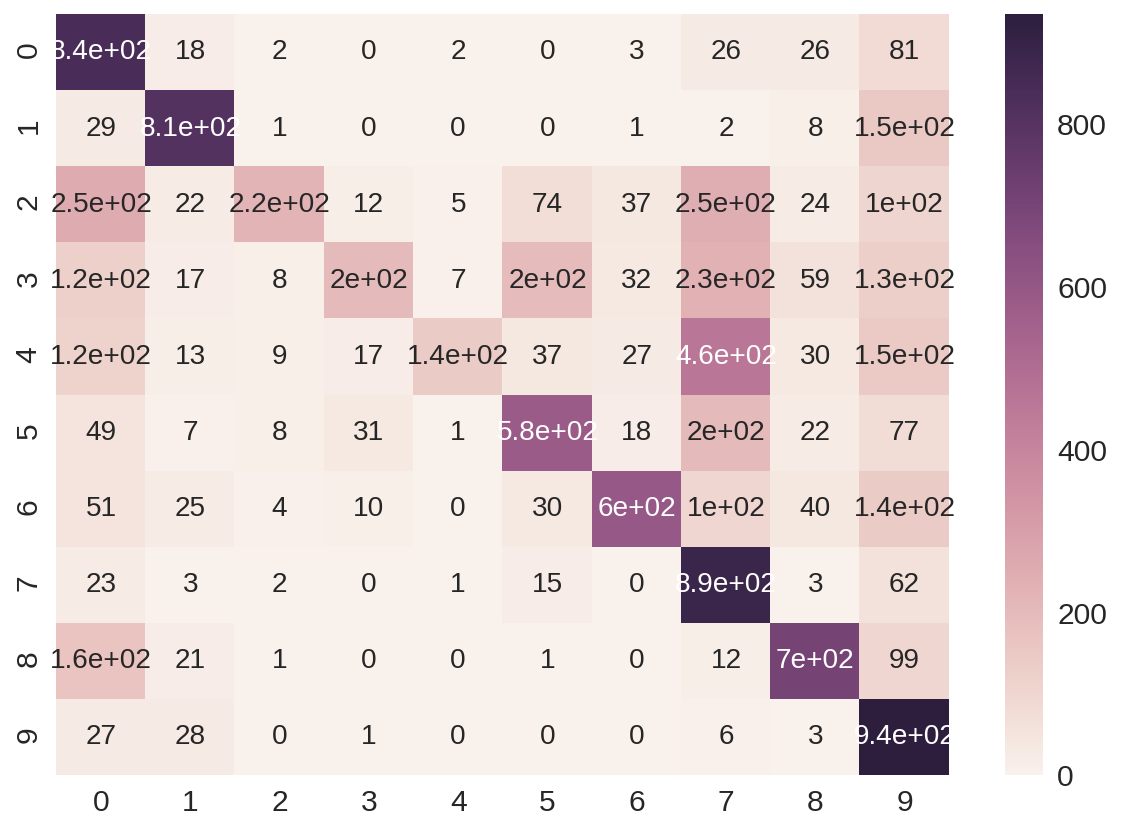

In [79]:
#Draw the confusion matrix

dataframeCF = pd.DataFrame(confusionmatrix, range(num_classes), range(num_classes))
plt.figure(figsize = (10,7))

sn.set(font_scale=1.5) # label size

sn.heatmap(dataframeCF, annot=True,annot_kws={"size": 14})# font size
plt.show()